<a href="https://colab.research.google.com/github/Sayefalikhan03/Daam/blob/main/daam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
!pip install daam==0.1.0
!pip install accelerate  # this is to reduce CPU model load overhead

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.1/305.1 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!nvidia-smi

Fri Jan  5 05:04:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from diffusers import StableDiffusionPipeline
import daam

In [ ]:
model = StableDiffusionPipeline.from_pretrained('stabilityai/stable-diffusion-2-base')
model = model.to('cuda')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

## Global Word Attribution Maps

  0%|          | 0/20 [00:00<?, ?it/s]

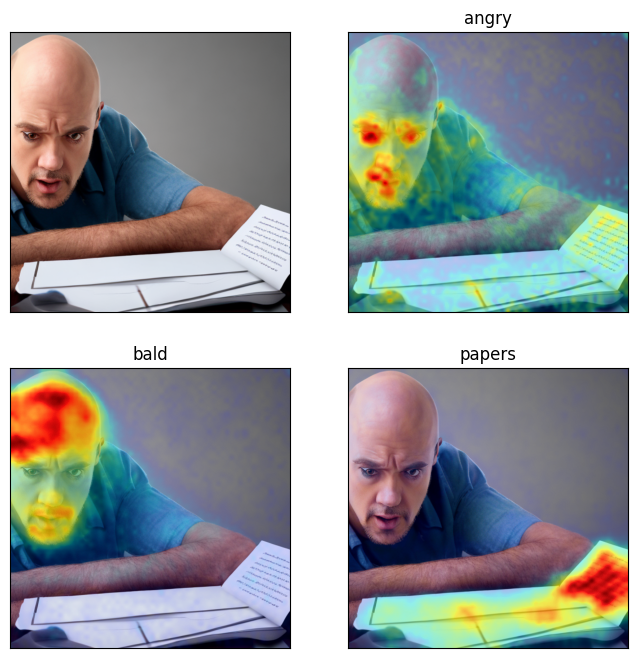

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

def make_im_subplots(*args):
  fig, ax = plt.subplots(*args)

  for ax_ in ax.flatten():
    ax_.set_xticks([])
    ax_.set_yticks([])

  return fig, ax

prompt = 'An angry, bald man writing papers'

# Trace through generation
with daam.trace(model) as trc:
  output_image = model(prompt, num_inference_steps=20).images[0]
  global_heat_map = trc.compute_global_heat_map()

angry_heat_map = global_heat_map.compute_word_heat_map('angry')
bald_heat_map = global_heat_map.compute_word_heat_map('bald')
papers_heat_map = global_heat_map.compute_word_heat_map('papers')

plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = make_im_subplots(2, 2)

# Original image
ax[0, 0].imshow(output_image)

# Angry heat map
angry_heat_map.plot_overlay(output_image, ax=ax[0, 1])

# Bald heat map
bald_heat_map.plot_overlay(output_image, ax=ax[1, 0])

# Papers heat map
papers_heat_map.plot_overlay(output_image, ax=ax[1, 1])

plt.show()

## Per-Head Attribution Maps

  0%|          | 0/21 [00:00<?, ?it/s]

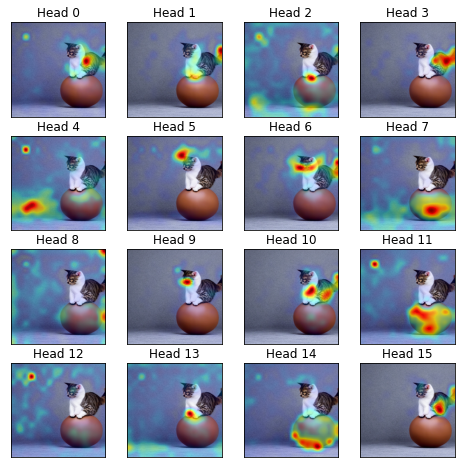

In [ ]:
prompt = 'A cute cat pouncing on a ball'
fig, ax = make_im_subplots(4, 4)

# Trace through generation
with daam.trace(model) as trc:
  output_image = model(prompt, num_inference_steps=20).images[0]

  for head_idx in range(16):
    ax_ = ax[head_idx // 4, head_idx % 4]
    global_heat_map = trc.compute_global_heat_map(head_idx=head_idx, layer_idx=2)
    angry_heat_map = global_heat_map.compute_word_heat_map('cat')
    angry_heat_map.plot_overlay(output_image, ax=ax_)
    ax_.set_title(f'Head {head_idx}')

plt.show()

## Adjectival Entanglement

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

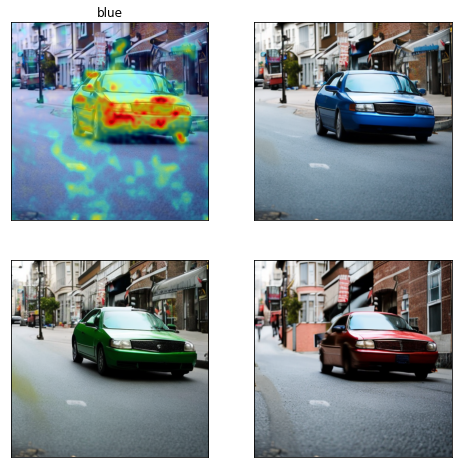

In [ ]:
# Trace through generation
import time
import torch
import random

def set_seed(seed):
  gen = torch.Generator(device='cuda')
  random.seed(seed)
  np.random.seed(seed)
  torch.cuda.manual_seed(seed)
  torch.manual_seed(seed)

  return gen.manual_seed(s)

s = int(time.time())
gen = set_seed(s)

with daam.trace(model, save_heads=True) as trc:
  blue_image = model('a blue car driving down the street', num_inference_steps=20, gen=gen).images[0]
  blue_map = trc.compute_global_heat_map().compute_word_heat_map('blue')

gen = set_seed(s)

with daam.trace(model, load_heads=True) as trc:
  green_image = model('a green car driving down the street', num_inference_steps=20, gen=gen).images[0]
  green_map = trc.compute_global_heat_map().compute_word_heat_map('green')

gen = set_seed(s)

with daam.trace(model, load_heads=True) as trc:
  red_image = model('a red car driving down the street', num_inference_steps=20, gen=gen).images[0]
  red_map = trc.compute_global_heat_map().compute_word_heat_map('red')

plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = make_im_subplots(2, 2)

# Original images
ax[0, 1].imshow(blue_image)
ax[1, 0].imshow(green_image)
ax[1, 1].imshow(red_image)

# Heat map
blue_map.plot_overlay(blue_image, ax=ax[0, 0])

plt.show()

## Cohyponym Entanglement

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

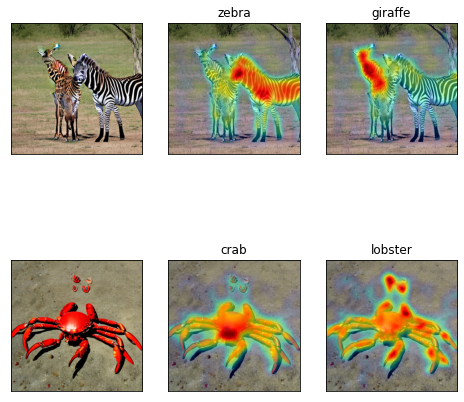

In [ ]:
plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = make_im_subplots(2, 3)

with daam.trace(model, save_heads=True) as trc:
  im1 = model('a zebra and a giraffe', num_inference_steps=20).images[0]
  heat_map = trc.compute_global_heat_map()
  zebra_map = heat_map.compute_word_heat_map('zebra')
  giraffe_map = heat_map.compute_word_heat_map('giraffe')

with daam.trace(model, save_heads=True) as trc:
  im2 = model('a crab and a lobster', num_inference_steps=20).images[0]
  heat_map = trc.compute_global_heat_map()
  crab_map = heat_map.compute_word_heat_map('crab')
  lobster_map = heat_map.compute_word_heat_map('lobster')

ax[0, 0].imshow(im1)
ax[1, 0].imshow(im2)
zebra_map.plot_overlay(im1, ax=ax[0, 1])
giraffe_map.plot_overlay(im1, ax=ax[0, 2])

crab_map.plot_overlay(im2, ax=ax[1, 1])
lobster_map.plot_overlay(im2, ax=ax[1, 2])

plt.show()